In [1]:
# Question 2 
# Anirudh Sathish 
# CS20B1125

2. Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) =0.3; P(ω2)=0.7
ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15]
ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]


In [1]:
# importing some neccesary libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from sympy import solve 

In [2]:
# lets represent class w1
l1 = [[1,-1],[ 2,-5],[ 3,-6], [4,-10], [5,-12], [6,-15]]
w1 = np.array(l1)

# simmilarly class w2
l2 = [[-1,1], [-2,5], [-3,6], [-4,10], [-5,12], [-6, 15]]
w2 = np.array(l2)

In [3]:
# find covariance matrix of each of the classes 

cov_w1 = np.cov(w1.T)
cov_w2 = np.cov(w2.T)


In [4]:
# let us look at the covariance matrices to look at what case they satisfy 
print("Cov1 :\n")
print(cov_w1)
print("\nCov2 :\n")
print(cov_w2)

Cov1 :

[[ 3.5        -9.5       ]
 [-9.5        26.16666667]]

Cov2 :

[[ 3.5        -9.5       ]
 [-9.5        26.16666667]]


Both are same , but not of the form sigma_square*I . So case 2 

In [5]:
# calculate the iverse of the covariance matrix 
inv_Cov_w1 = np.linalg.inv(cov_w1)
inv_Cov_w2 = np.linalg.inv(cov_w2)

# calculate mean 
mean_w1 = np.round(np.mean(w1,axis = 0),2)
mean_w2 = np.round(np.mean(w2 , axis = 0),2)
print(mean_w1,mean_w2)

[ 3.5  -8.17] [-3.5   8.17]


In [6]:
# for calculating decision boundary 
from sympy import symbols , expand , Poly

x , y = symbols('x , y')
X = np.array([[x],[y]])
print(X)


p_w1 = 0.3 
p_w2 = 0.7

[[x]
 [y]]


In [7]:
# for case 2 let us find W1 and W0 for each class 

# class w1
W1_class_w1 = mean_w1 @ inv_Cov_w1
W0_class_w1 = (-1/2*(np.matmul(np.matmul((mean_w1).T,inv_Cov_w1),mean_w1))) + np.log(p_w1)

# decision boundaring g(x) for class w1 
g_w1 = W1_class_w1 @ X + W0_class_w1
print(g_w1)

[10.4762500000001*x + 3.49125000000003*y - 5.27565405432596]


In [8]:
# class w2
W1_class_w2 = mean_w2 @ inv_Cov_w2
W0_class_w2 = (-1/2*(np.matmul(np.matmul((mean_w2).T,inv_Cov_w2),mean_w2))) + np.log(p_w2)

# decision boundaring g(x) for class w2 
g_w2 = W1_class_w2 @ X + W0_class_w2
print(g_w2)

[-10.4762500000001*x - 3.49125000000003*y - 4.42835619393876]


In [11]:
gx = g_w1 - g_w2
print(gx)

sol = solve(gx,y)
print(sol)

[20.9525000000002*x + 6.98250000000007*y - 0.847297860387203]
{y: 0.121345916274571 - 3.00071607590404*x}


Plotting the decision boundary 

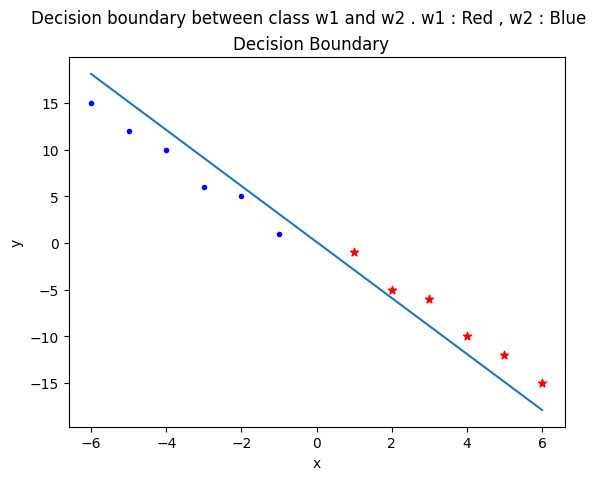

In [14]:
x_temp = np.linspace(-6,6,100)
y_temp = 0.121345916274571 - 3.00071607590404*x_temp

plt.plot(x_temp,y_temp)
plt.scatter(w1[:,0],w1[:,1],color = 'red' , marker = '*')
plt.scatter(w2[:,0],w2[:,1],color = 'blue' , marker = '.')

plt.xlabel("x")
plt.ylabel("y")

title = "Decision boundary between class w1 and w2 . w1 : Red , w2 : Blue"
plt.suptitle(title)
plt.title('Decision Boundary  ')

plt.show()